In [1]:
# coding: utf-8
import sys
import pandas as pd
import urllib.request
import zipfile, io
import csv
import os
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import norm
import scipy.stats as stats
import matplotlib.mlab as mlab
import math
from urllib.request import urlopen
from urllib.request import urlretrieve
from requests import session
from lxml import html
import requests
import http.cookiejar
#import selenium
#from selenium import webdriver
#from selenium.webdriver.common.keys import Keys
#from bs4 import BeautifulSoup
import tabulate
import h2o
import seaborn as sns

In [2]:
import sklearn
from sklearn import *
from sklearn.cross_validation import train_test_split
from sklearn.metrics import *
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets, linear_model

C:\Users\Yamini\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Yamini\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Yamini\Anaconda3\lib\site-packages\sklearn\lda.py:6: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Users\Yamini\An

In [3]:
%matplotlib inline
%matplotlib notebook

In [860]:
priorQuarterCleanData = 'priorQuarterCleanData.csv'
nextQuarterCleanData = 'nextQuarterCleanData.csv'
priorQuarter = 'priorQuarter.csv'
nextQuarter = 'nextQuarter.csv'
modelMetrics = 'modelMetrics.csv'
neuralNetworkMetrics = 'neuralNetworkMetrics.csv'


In [5]:
quarter = os.getenv("Quarter")
year = os.getenv("Year")

#quarter = sys.argv[1]
#year = sys.argv[2]

In [441]:
if(year is None or year==""):
    print("Please enter valid year")
    exit()
else:
    print("Year is:" + str(year))


Please enter valid year


In [ ]:
#pathPriorquarter = ""
#pathNextquarter = ""

In [6]:
# Validate input argument and set year to 2005 if validation fails
try:
    if len(year) >= 2:
        #if isinstance(year,int):
        year=int(year)
        print(year)
        if not(1999 <= year <=2016):
            print("Enter valid year")
    else:
        year=2005
except Exception as err:
    year=2005
print(year)

2005


In [7]:
try:
    if len(quarter) == 1:
        #if isinstance(year,int):
        quarter=int(quarter)
        print(quarter)
        if not(1 <= quarter <=4):
            print("Enter valid quarter")
    else:
        quarter=1
except Exception as err:
    quarter=1
print(quarter)

1


In [6]:
#Function to generate urlLIst for origination and next quarter URLs
def generateURLList(quarter,year):
    next_quarter = quarter +1
    next_year = year +1
    urlTrainList = []
    urlTestList = []
    train_url = "https://freddiemac.embs.com/FLoan/Data/historical_data1_Q" + str(quarter)+str(year)+ ".zip"
    urlTrainList.append(train_url)
    if quarter == 4:
        quarter=1
        test_url = "https://freddiemac.embs.com/FLoan/Data/historical_data1_Q" + str(quarter)+str(next_year)+ ".zip"
        urlTestList.append(test_url)
    else:
        test_url = "https://freddiemac.embs.com/FLoan/Data/historical_data1_Q" + str(next_quarter)+str(year)+ ".zip"
        urlTestList.append(test_url) 
    return urlTrainList,urlTestList

In [7]:
#call to function to get URLs in the list
#replace inputs by int(quarter),int(year)

urlTrainList = generateURLList(1,2005)
#urlTrainList = generateURLList(int(quarter),int(year))
print("----Generated URLs----")
for fileURL in urlTrainList[0]:
     print(fileURL)  
for fileURL in urlTrainList[1]:
     print(fileURL)        

----Generated URLs----
https://freddiemac.embs.com/FLoan/Data/historical_data1_Q12005.zip
https://freddiemac.embs.com/FLoan/Data/historical_data1_Q22005.zip


In [8]:
#Start session
session = requests.session()

In [9]:
#get the login
login_url = "https://freddiemac.embs.com/FLoan/secure/auth.php"
values = dict(username= 'yamini.mait@gmail.com',password= 'Q4kzCWSk')
r = session.post(login_url,data=values)
r.status_code

200

In [11]:
valuesNew={'accept':'Yes', 'acceptSubmit':'Continue', 'action':'acceptTandC'}
url='https://freddiemac.embs.com/FLoan/Data/download.php'
login=session.post(url,data=valuesNew)
page=login.content

In [12]:
#Check cookies
cookies = r.cookies
cookies

<RequestsCookieJar[Cookie(version=0, name='PHPSESSID', value='m4ki0ude1l4buqfpitjc04rfv4', port=None, port_specified=False, domain='freddiemac.embs.com', domain_specified=False, domain_initial_dot=False, path='/', path_specified=True, secure=True, expires=None, discard=True, comment=None, comment_url=None, rest={'HttpOnly': None}, rfc2109=False)]>

In [21]:
#get the geckopathdriver
#geckoPath = 'C:/Users/Yamini/Downloads/geckodriver-v0.14.0-win64/geckodriver.exe'

In [22]:
#browser = webdriver.Firefox(executable_path=geckoPath)
#browser.get('https://freddiemac.embs.com/FLoan/secure/login.php')

In [23]:
#username = browser.find_element_by_id("username")
#password = browser.find_element_by_id("password")
#username.send_keys("yamini.mait@gmail.com")
#password.send_keys("Q4kzCWSk")

In [24]:
#loginForm = browser.find_element_by_name('loginform')
#loginForm.submit()

In [25]:
#browser.find_element_by_name('accept').click(); 
#browser.find_element_by_name('acceptSubmit').click(); 
#browser
#page = browser.page_source

In [13]:
soup = BeautifulSoup(page)

C:\Users\Yamini\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file C:\Users\Yamini\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [14]:
tables = soup.find_all('table',attrs={'class':'table1'})
a_tags = soup.findAll('a')

In [28]:
#quarter=1
#next_quarter = quarter +1
#year =2005
#next_year = year +1

In [15]:
####Cleaning dataset method

def handleMissingData(df):
    #Fill date if credit_score is null
    df.Credit_Score = pd.to_numeric(df.Credit_Score,errors = 'coerce')
    df['Credit_Score'].fillna(0,inplace=True)
    df['Credit_Score'].replace(0,df.Credit_Score.mean(),inplace=True)
    #if First_Time_Homebuyer_Flag is null fill 'NotApplicable' 
    df['First_Time_Homebuyer_Flag'].fillna('Not Applicable',inplace=True)
    #If MSA is null, fill mean
    df['MSA'].fillna(df.MSA.median(),inplace=True)
    #If MI is null, just take the finite rows
    df.MI = pd.to_numeric(df.MI,errors = 'coerce')
    df['MI'].fillna(df.MI.mean(),inplace=True)
    #If Number_Of_Units is null fill mode
    df['Number_Of_Units'].fillna(df['Number_Of_Units'].mode()[0],inplace=True)
    #if Occupancy_Status is null, fill mode
    df['Occupancy_Status'].fillna(df['Occupancy_Status'].mode()[0],inplace=True)
    #if CLTV is null, fill mean
    df['CLTV'].fillna(df.CLTV.mean(),inplace=True)
    #if DTI_Ratio is null, fill mean
    df.DTI_Ratio = pd.to_numeric(df.DTI_Ratio,errors = 'coerce')
    df['DTI_Ratio'].fillna(df.DTI_Ratio.mean(),inplace=True)
    #if LTV is null, fill mean
    df['LTV'].fillna( df.LTV.mean(),inplace=True)
    #if Channel is null, fill mode
    df['Channel'].fillna(df['Channel'].mode()[0],inplace=True)
    #if PPM is null, fill mode
    df['PPM'].fillna(df['PPM'].mode()[0],inplace=True)
    #if Property_Type is null, fill mode as SF
    df['Property_Type'].fillna(df['Property_Type'].mode()[0],inplace=True)
    #If Postal_Code is null, fill 0
    df.Postal_Code.fillna(0,inplace=True)
    #If Number_Of_borrowers is null, fill mode
    df['Number_Of_Borrowers'].fillna(df['Number_Of_Borrowers'].mode()[0],inplace=True)
    #If Super_Conforming_Flag is all null, drop the column
    df = df.dropna(axis=1,how='all')
    return df

In [16]:
#Factorize the dataset columns
def dataFactorize(df):
    #df.dropna(inplace=True)
    df['First_Time_Homebuyer_Flag'] = pd.factorize(df.First_Time_Homebuyer_Flag)[0]
    df['Occupancy_Status'] = pd.factorize(df.Occupancy_Status)[0]
    df['Channel'] = pd.factorize(df.Channel)[0]   
    df['PPM'] = pd.factorize(df.PPM)[0]
    df['Product_Type'] = pd.factorize(df.Product_Type)[0]  
    df['Property_State'] = pd.factorize(df.Property_State)[0]
    df['Property_Type'] = pd.factorize(df.Property_Type)[0]
    df['Loan_Purpose'] = pd.factorize(df.Loan_Purpose)[0]
    df['Loan_Sequence_Nmber'] = pd.factorize(df.Loan_Sequence_Nmber)[0]
    df['Service_Name'] = pd.factorize(df.Service_Name)[0]
    df['Seller_Name'] = pd.factorize(df.Seller_Name)[0]
    return df

In [17]:
def checkPercentageOfMissingData(df):
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    print(mis_val_percent)

In [ ]:
#Get Prior Quarter Data

for fileURL in urlTrainList[0]:
    try:
        response = urllib.request.urlopen(fileURL)
        if response.getcode()==200:
            data = response.read()
            print("Reading Data")
            if zipfile.is_zipfile(io.BytesIO(data)) == True:
                print("ZipFile is valid")
                z = zipfile.ZipFile(io.BytesIO(data))
                for file in z.namelist():
                    if "historical_data1_Q" in str(file):
                        print("Get the file:"+file)
                        textFile = z.read(file)
                        df_TrainRawData = pd.read_csv(io.BytesIO(textFile),sep = '|',header=None)
                        print("File read into dataframe.This is raw Data.")
                        print(df_TrainRawData.shape)
                        df_TrainRawData.columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name','Super_Conforming_Flag']
            else:
                print("[ERROR] Invalid ZIP File found at " + fileURL)
                exit()
        else:
            print("[ERROR] Invalid URL, URL( " + fileURL + " ) returned a bad HTTP response code of " + str(response.getcode()))
        response.close()
    except Exception as err:
        print("Error occured, possibly an interrupted Internet connection")
        exit()


In [ ]:
#Get Next Quarter Data
for fileURL in urlTrainList[1]:
    try:
        response = urllib.request.urlopen(fileURL)
        if response.getcode()==200:
            data = response.read()
            print("Reading Data")
            if zipfile.is_zipfile(io.BytesIO(data)) == True:
                print("ZipFile is valid")
                z = zipfile.ZipFile(io.BytesIO(data))
                for file in z.namelist():
                    if "historical_data1_Q" in str(file):
                        print("Get the file:"+file)
                        textFile = z.read(file)
                        df_TestRawData = pd.read_csv(io.BytesIO(textFile),sep = '|',header=None)
                        print(df_TrainRawData.shape)
                        df_TestRawData.columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name','Super_Conforming_Flag']
            else:
                print("[ERROR] Invalid ZIP File found at " + fileURL)
        else:
            print("[ERROR] Invalid URL, URL( " + fileURL + " ) returned a bad HTTP response code of " + str(response.getcode()))
        response.close()
    except Exception as err:
        print("Error occured, possibly an interrupted Internet connection")

In [862]:
#create csv file with raw data 
df_TrainRawData.to_csv(priorQuarter,sep='\t', encoding='utf-8',index=False)
print("File created For Given Quarter: priorQuarter.csv")
df_TestRawData.to_csv(nextQuarter,sep='\t', encoding='utf-8',index=False)
print("File created for Next Immediate quarter: nextQuarter.csv")

In [19]:
#Check data in both the quarters
df_TrainRawData.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name,Super_Conforming_Flag
0,699,200505,N,203504,39300.0,000,1.0,O,56.0,42,...,RI,SF,2800.0,F105Q1000001,C,360,2.0,Other sellers,USBANKNA,NaN
1,691,200504,N,203503,36420.0,25,1.0,O,90.0,36,...,OK,SF,73000.0,F105Q1000002,N,360,1.0,Other sellers,Other servicers,NaN
2,713,200503,N,203502,28740.0,000,1.0,O,72.0,45,...,NY,SF,12500.0,F105Q1000003,P,360,2.0,Other sellers,Other servicers,NaN
3,719,200505,N,203504,NaN,000,1.0,S,85.0,47,...,MO,CO,65000.0,F105Q1000004,P,360,2.0,Other sellers,USBANKNA,NaN
4,656,200503,N,203502,40340.0,000,1.0,O,68.0,30,...,MN,SF,55900.0,F105Q1000005,C,360,2.0,Other sellers,Other servicers,NaN


In [20]:
df_TestRawData.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name,Super_Conforming_Flag
0,715,200508,N,203507,33700.0,0,1.0,O,58.0,41,...,CA,SF,95300.0,F105Q2000001,C,360,2.0,Other sellers,"WELLSFARGOBANK,NA",NaN
1,743,200508,N,203507,NaN,0,1.0,O,80.0,36,...,IL,SF,62400.0,F105Q2000002,N,360,2.0,Other sellers,"PNCMTGESERVICES,INC",NaN
2,772,200508,N,203507,37860.0,0,1.0,O,80.0,34,...,FL,PU,32500.0,F105Q2000003,P,360,1.0,Other sellers,Other servicers,NaN
3,773,200507,N,203506,NaN,0,1.0,O,64.0,60,...,MN,SF,56300.0,F105Q2000004,N,360,2.0,Other sellers,USBANKNA,NaN
4,647,200508,N,203507,NaN,30,1.0,O,91.0,28,...,MI,SF,49200.0,F105Q2000005,N,360,1.0,Other sellers,Other servicers,NaN


In [21]:
#Check Summary statistics
df_TrainRawData.describe()


C:\Users\Yamini\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,First_Payment_Date,Maturity_Date,MSA,Number_Of_Units,CLTV,Original_UPB,LTV,Interest_Rate,Postal_Code,Original_Loan_Term,Number_Of_Borrowers,Super_Conforming_Flag
count,351739.000000,351739.000000,296942.000000,351735.000000,351720.000000,351739.000000,351720.000000,351739.000000,351737.000000,351739.000000,351628.000000,0.0
mean,200504.721819,203110.734152,30556.484566,1.029295,70.785133,164822.695237,69.394504,5.660460,51152.845166,312.855518,1.583799,NaN
std,10.507942,651.172151,11364.449318,0.215589,18.059677,85000.217431,17.382294,0.367824,29228.174395,78.116860,0.492928,NaN
min,200001.000000,201002.000000,10180.000000,1.000000,6.000000,6000.000000,6.000000,3.500000,600.000000,60.000000,1.000000,NaN
25%,200503.000000,202504.000000,NaN,NaN,NaN,100000.000000,NaN,5.375000,NaN,240.000000,NaN,NaN
50%,200504.000000,203503.000000,NaN,NaN,NaN,150000.000000,NaN,5.625000,NaN,360.000000,NaN,NaN
75%,200505.000000,203504.000000,NaN,NaN,NaN,217000.000000,NaN,5.875000,NaN,360.000000,NaN,NaN
max,201509.000000,205109.000000,49740.000000,4.000000,160.000000,692000.000000,100.000000,10.350000,99900.000000,557.000000,2.000000,NaN


In [22]:
#Check correlation matrix
df_TrainRawData.corr()


,First_Payment_Date,Maturity_Date,MSA,Number_Of_Units,CLTV,Original_UPB,LTV,Interest_Rate,Postal_Code,Original_Loan_Term,Number_Of_Borrowers,Super_Conforming_Flag
First_Payment_Date,1.000000,0.025902,0.005235,-0.004890,-0.000788,0.019629,-0.000249,0.049077,-0.011274,0.010606,0.015294,NaN
Maturity_Date,0.025902,1.000000,0.014618,0.004271,0.321345,0.250198,0.316252,0.512327,0.012663,0.999870,-0.049046,NaN
MSA,0.005235,0.014618,1.000000,-0.003489,-0.072563,0.055513,-0.070425,0.019171,0.097302,0.014572,0.014848,NaN
Number_Of_Units,-0.004890,0.004271,-0.003489,1.000000,-0.035890,0.075519,-0.030635,0.040716,-0.042541,0.004338,-0.024080,NaN
CLTV,-0.000788,0.321345,-0.072563,-0.035890,1.000000,0.111187,0.964120,0.246179,-0.039533,0.321469,-0.034486,NaN
Original_UPB,0.019629,0.250198,0.055513,0.075519,0.111187,1.000000,0.098958,-0.080605,0.039254,0.249994,0.171106,NaN
LTV,-0.000249,0.316252,-0.070425,-0.030635,0.964120,0.098958,1.000000,0.254511,-0.043230,0.316365,-0.043682,NaN
Interest_Rate,0.049077,0.512327,0.019171,0.040716,0.246179,-0.080605,0.254511,1.000000,-0.010093,0.511831,-0.090701,NaN
Postal_Code,-0.011274,0.012663,0.097302,-0.042541,-0.039533,0.039254,-0.043230,-0.010093,1.000000,0.012809,0.046934,NaN
Original_Loan_Term,0.010606,0.999870,0.014572,0.004338,0.321469,0.249994,0.316365,0.511831,0.012809,1.000000,-0.049249,NaN


In [23]:
#Create a dataframe on which we will form our models and do analysis
df_PriorQuarter = pd.DataFrame(df_TrainRawData,columns=['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name'])

In [24]:
df_PriorQuarter.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name
0,699,200505,N,203504,39300.0,000,1.0,O,56.0,42,...,FRM,RI,SF,2800.0,F105Q1000001,C,360,2.0,Other sellers,USBANKNA
1,691,200504,N,203503,36420.0,25,1.0,O,90.0,36,...,FRM,OK,SF,73000.0,F105Q1000002,N,360,1.0,Other sellers,Other servicers
2,713,200503,N,203502,28740.0,000,1.0,O,72.0,45,...,FRM,NY,SF,12500.0,F105Q1000003,P,360,2.0,Other sellers,Other servicers
3,719,200505,N,203504,NaN,000,1.0,S,85.0,47,...,FRM,MO,CO,65000.0,F105Q1000004,P,360,2.0,Other sellers,USBANKNA
4,656,200503,N,203502,40340.0,000,1.0,O,68.0,30,...,FRM,MN,SF,55900.0,F105Q1000005,C,360,2.0,Other sellers,Other servicers


In [25]:
#Just checking the datatypes
df_PriorQuarter.dtypes

Credit_Score                  object
First_Payment_Date             int64
First_Time_Homebuyer_Flag     object
Maturity_Date                  int64
MSA                          float64
MI                            object
Number_Of_Units              float64
Occupancy_Status              object
CLTV                         float64
DTI_Ratio                     object
Original_UPB                   int64
LTV                          float64
Interest_Rate                float64
Channel                       object
PPM                           object
Product_Type                  object
Property_State                object
Property_Type                 object
Postal_Code                  float64
Loan_Sequence_Nmber           object
Loan_Purpose                  object
Original_Loan_Term             int64
Number_Of_Borrowers          float64
Seller_Name                   object
Service_Name                  object
dtype: object

In [26]:
#get the data for testing dataset into some other dataframe
df_NextQuarter = pd.DataFrame(df_TestRawData,columns=['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name'])


In [27]:
df_NextQuarter.head()

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name
0,715,200508,N,203507,33700.0,0,1.0,O,58.0,41,...,FRM,CA,SF,95300.0,F105Q2000001,C,360,2.0,Other sellers,"WELLSFARGOBANK,NA"
1,743,200508,N,203507,NaN,0,1.0,O,80.0,36,...,FRM,IL,SF,62400.0,F105Q2000002,N,360,2.0,Other sellers,"PNCMTGESERVICES,INC"
2,772,200508,N,203507,37860.0,0,1.0,O,80.0,34,...,FRM,FL,PU,32500.0,F105Q2000003,P,360,1.0,Other sellers,Other servicers
3,773,200507,N,203506,NaN,0,1.0,O,64.0,60,...,FRM,MN,SF,56300.0,F105Q2000004,N,360,2.0,Other sellers,USBANKNA
4,647,200508,N,203507,NaN,30,1.0,O,91.0,28,...,FRM,MI,SF,49200.0,F105Q2000005,N,360,1.0,Other sellers,Other servicers


In [28]:
#Now we have Training:df_PriorQuarter  and Testing:df_NextQuarter dataset ready
####################Data Cleansing############################

In [29]:
#Check percentage of missing values in all the columns of given quarter
print("percentage of missing values in all the columns of given quarter")
checkPercentageOfMissingData(df_PriorQuarter)
checkPercentageOfMissingData(df_NextQuarter)

percentage of missing values in all the columns of given quarter
Credit_Score                  0.000000
First_Payment_Date            0.000000
First_Time_Homebuyer_Flag    12.125184
Maturity_Date                 0.000000
MSA                          15.578881
MI                            0.000000
Number_Of_Units               0.001137
Occupancy_Status              0.000000
CLTV                          0.005402
DTI_Ratio                     0.129073
Original_UPB                  0.000000
LTV                           0.005402
Interest_Rate                 0.000000
Channel                       0.000000
PPM                           0.094672
Product_Type                  0.000000
Property_State                0.000000
Property_Type                 0.000000
Postal_Code                   0.000569
Loan_Sequence_Nmber           0.000000
Loan_Purpose                  0.000000
Original_Loan_Term            0.000000
Number_Of_Borrowers           0.031557
Seller_Name                   0.000000

In [30]:
#Call method for data cleansing
handleMissingData(df_PriorQuarter)

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name
0,699.0,200505,N,203504,39300.0,0.0,1.0,O,56.0,42.0,...,FRM,RI,SF,2800.0,F105Q1000001,C,360,2.0,Other sellers,USBANKNA
1,691.0,200504,N,203503,36420.0,25.0,1.0,O,90.0,36.0,...,FRM,OK,SF,73000.0,F105Q1000002,N,360,1.0,Other sellers,Other servicers
2,713.0,200503,N,203502,28740.0,0.0,1.0,O,72.0,45.0,...,FRM,NY,SF,12500.0,F105Q1000003,P,360,2.0,Other sellers,Other servicers
3,719.0,200505,N,203504,32900.0,0.0,1.0,S,85.0,47.0,...,FRM,MO,CO,65000.0,F105Q1000004,P,360,2.0,Other sellers,USBANKNA
4,656.0,200503,N,203502,40340.0,0.0,1.0,O,68.0,30.0,...,FRM,MN,SF,55900.0,F105Q1000005,C,360,2.0,Other sellers,Other servicers
5,641.0,200504,N,203503,19500.0,30.0,1.0,O,94.0,41.0,...,FRM,IL,SF,62500.0,F105Q1000006,N,360,1.0,Other sellers,Other servicers
6,646.0,200505,N,203504,17140.0,0.0,1.0,O,77.0,43.0,...,FRM,KY,SF,41000.0,F105Q1000007,N,360,2.0,Other sellers,Other servicers
7,586.0,200503,N,203502,28740.0,0.0,1.0,O,80.0,34.0,...,FRM,NY,PU,12400.0,F105Q1000008,P,360,2.0,Other sellers,Other servicers
8,582.0,200503,N,203502,32900.0,0.0,1.0,O,80.0,41.0,...,FRM,WA,MH,98900.0,F105Q1000009,P,360,2.0,Other sellers,Other servicers
9,720.0,200503,N,203502,36500.0,30.0,1.0,O,95.0,32.0,...,FRM,WA,CO,98500.0,F105Q1000010,P,360,1.0,Other sellers,"PNCMTGESERVICES,INC"


In [31]:
handleMissingData(df_NextQuarter)

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name
0,715.0,200508,N,203507,33700.0,0.0,1.0,O,58.0,41.0,...,FRM,CA,SF,95300.0,F105Q2000001,C,360,2.0,Other sellers,"WELLSFARGOBANK,NA"
1,743.0,200508,N,203507,33124.0,0.0,1.0,O,80.0,36.0,...,FRM,IL,SF,62400.0,F105Q2000002,N,360,2.0,Other sellers,"PNCMTGESERVICES,INC"
2,772.0,200508,N,203507,37860.0,0.0,1.0,O,80.0,34.0,...,FRM,FL,PU,32500.0,F105Q2000003,P,360,1.0,Other sellers,Other servicers
3,773.0,200507,N,203506,33124.0,0.0,1.0,O,64.0,60.0,...,FRM,MN,SF,56300.0,F105Q2000004,N,360,2.0,Other sellers,USBANKNA
4,647.0,200508,N,203507,33124.0,30.0,1.0,O,91.0,28.0,...,FRM,MI,SF,49200.0,F105Q2000005,N,360,1.0,Other sellers,Other servicers
5,748.0,200506,N,203505,36740.0,25.0,1.0,O,86.0,22.0,...,FRM,FL,SF,34700.0,F105Q2000006,P,360,1.0,Other sellers,USBANKNA
6,683.0,200506,N,203505,33124.0,30.0,1.0,O,95.0,31.0,...,FRM,NE,SF,68800.0,F105Q2000007,P,360,2.0,Other sellers,Other servicers
7,767.0,200506,N,203505,37900.0,30.0,1.0,O,95.0,34.0,...,FRM,IL,SF,61700.0,F105Q2000008,P,360,2.0,Other sellers,Other servicers
8,809.0,200506,N,203505,33124.0,0.0,1.0,O,50.0,41.0,...,FRM,NE,PU,68800.0,F105Q2000009,N,360,1.0,Other sellers,Other servicers
9,721.0,200506,N,203505,33124.0,30.0,1.0,O,95.0,24.0,...,FRM,IN,SF,46700.0,F105Q2000010,N,360,2.0,Other sellers,USBANKNA


In [32]:
#Create csv files with clean data
df_PriorQuarter.to_csv(priorQuarterCleanData,sep='\t', encoding='utf-8',index=False)
print("File created For Given Quarter: priorQuarterCleanData.csv")
df_NextQuarter.to_csv(nextQuarterCleanData,sep='\t', encoding='utf-8',index=False)
print("File created for Next Immediate quarter: nextQuarterCleanData.csv")


File created For Given Quarter: priorQuarterCleanData.csv
File created for Next Immediate quarter: nextQuarterCleanData.csv


In [33]:
#Check if there is any null?
checkPercentageOfMissingData(df_PriorQuarter)

Credit_Score                 0.0
First_Payment_Date           0.0
First_Time_Homebuyer_Flag    0.0
Maturity_Date                0.0
MSA                          0.0
MI                           0.0
Number_Of_Units              0.0
Occupancy_Status             0.0
CLTV                         0.0
DTI_Ratio                    0.0
Original_UPB                 0.0
LTV                          0.0
Interest_Rate                0.0
Channel                      0.0
PPM                          0.0
Product_Type                 0.0
Property_State               0.0
Property_Type                0.0
Postal_Code                  0.0
Loan_Sequence_Nmber          0.0
Loan_Purpose                 0.0
Original_Loan_Term           0.0
Number_Of_Borrowers          0.0
Seller_Name                  0.0
Service_Name                 0.0
dtype: float64


In [34]:
checkPercentageOfMissingData(df_NextQuarter)

Credit_Score                 0.0
First_Payment_Date           0.0
First_Time_Homebuyer_Flag    0.0
Maturity_Date                0.0
MSA                          0.0
MI                           0.0
Number_Of_Units              0.0
Occupancy_Status             0.0
CLTV                         0.0
DTI_Ratio                    0.0
Original_UPB                 0.0
LTV                          0.0
Interest_Rate                0.0
Channel                      0.0
PPM                          0.0
Product_Type                 0.0
Property_State               0.0
Property_Type                0.0
Postal_Code                  0.0
Loan_Sequence_Nmber          0.0
Loan_Purpose                 0.0
Original_Loan_Term           0.0
Number_Of_Borrowers          0.0
Seller_Name                  0.0
Service_Name                 0.0
dtype: float64


In [35]:
# Create list for Model metrics we will generate
Model_Metrics = []

In [36]:
#Linear Regression Model

In [37]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

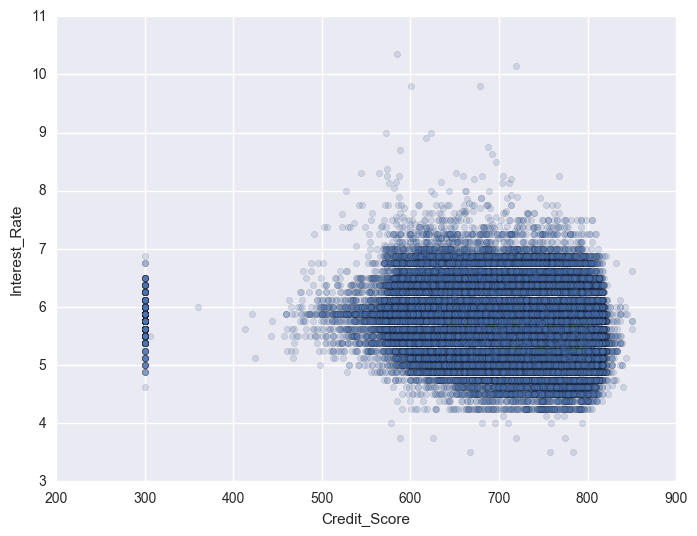

In [47]:
df_PriorQuarter.plot(kind='scatter', x='Credit_Score', y='Interest_Rate', alpha=0.2)


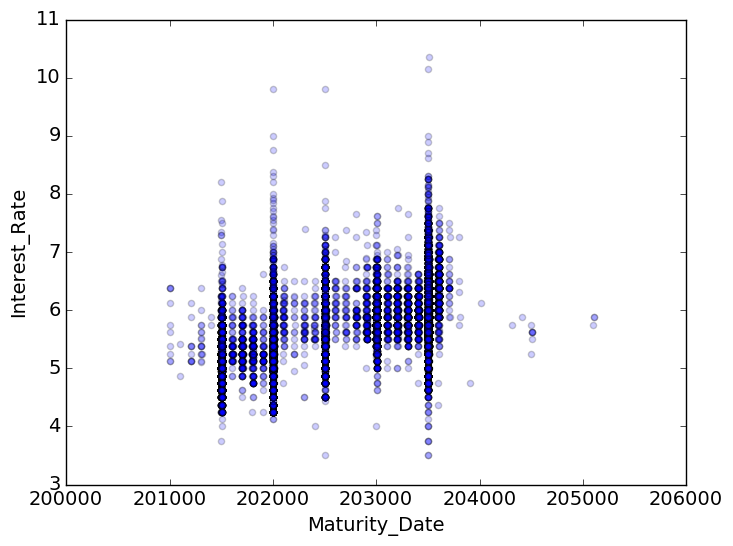

In [37]:
df_PriorQuarter.plot(kind='scatter', x='Maturity_Date', y='Interest_Rate', alpha=0.2)

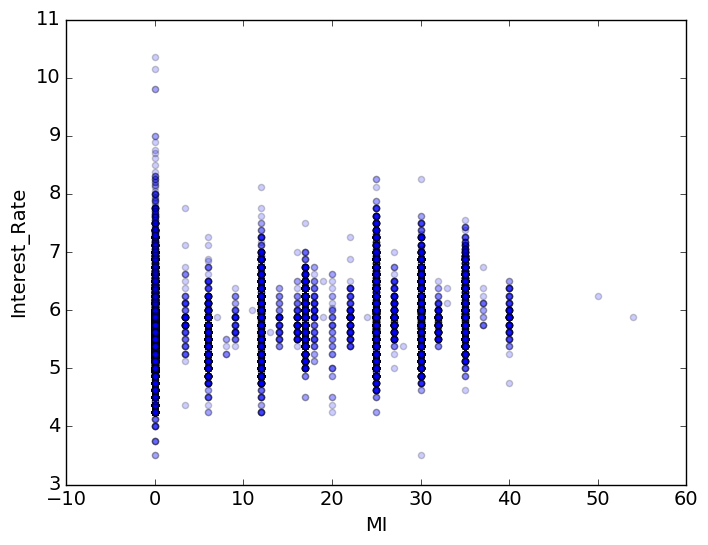

In [38]:
df_PriorQuarter.plot(kind='scatter', x='MI', y='Interest_Rate', alpha=0.2)

In [48]:
#Get Data values for building linear model
dataFactorize(df_PriorQuarter)
dataFactorize(df_NextQuarter)
Linearfeature_cols = df_PriorQuarter.columns[df_PriorQuarter.columns.str.startswith('S') == False].drop('Interest_Rate')
Lineartest_cols = df_NextQuarter.columns[df_NextQuarter.columns.str.startswith('S') == False].drop('Interest_Rate')
X_Ltrain = df_PriorQuarter[Linearfeature_cols]
y_Ltrain = df_PriorQuarter.Interest_Rate
X_Ltest = df_NextQuarter[Lineartest_cols]
y_Ltest = df_NextQuarter.Interest_Rate

In [559]:
#Choosing features : Credit_Score,Maturity_date,Mi,Occupancy_Status,Original_UPB,Original_Loan_Term
X_L1train = df_PriorQuarter[[0,3,5,7,10,21]]
y_L1train = df_PriorQuarter.Interest_Rate
X_L1test = df_NextQuarter[[0,3,5,7,10,21]]
y_L1test = df_NextQuarter.Interest_Rate

#0,2,3,5,6,10

In [560]:
def linearRegression(X_Ltrain,y_Ltrain):
    print("Linear Regression model computation starts")
    lm_model=linear_model.LinearRegression()
    lm_model.fit(X_Ltrain,y_Ltrain)
    print('Linear Regression model computation has completed')
    print(lm_model.coef_)
    print(lm_model.intercept_)
    train_pred = lm_model.predict(X_Ltrain)
    print("R-Square",r2_score(y_Ltrain,train_pred))
    return(lm_model,'Linear Regression')
def predictAndEvaluate(model,X_Ltest,y_Ltest):
    test_pred = model.predict(X_Ltest)
    MAE = mean_absolute_error(y_Ltest,test_pred)
    MSE = mean_squared_error(y_Ltest,test_pred)
    MedianAE = median_absolute_error(y_Ltest,test_pred)
    MAPE = np.mean(np.abs((y_Ltest - test_pred) / y_Ltest)) * 100
    RMSE = np.sqrt(mean_squared_error(y_Ltest, test_pred))
    #plt.scatter(y_Ltest,test_pred)
    #plt.xlabel("Interest_Rate")
    #plt.ylabel("Predicted Interest_Rate")
    #plt.show()
    return (test_pred,RMSE,MAE,MAPE)    

In [45]:
lm_1,algo_name = linearRegression(X_Ltrain,y_Ltrain)
predictAndEvaluate(lm_1,X_Ltest,y_Ltest)

Linear Regression model computation starts
Linear Regression model computation has completed
[ -8.28770393e-04   3.55994452e-03   1.72242789e-02  -2.15325504e-03
   5.37975918e-07   4.48834070e-03   4.04610256e-02   1.39821748e-01
   9.87169836e-04  -4.72687540e-04  -7.57521843e-07   1.95486614e-04
  -7.78179076e-02   2.99245568e-01  -1.94289029e-16  -1.22111098e-03
   1.78978075e-02  -1.04109371e-07   2.45139822e-07  -3.91336447e-02
   2.07563314e-02  -2.57882810e-02]
-276.608833654
R-Square 0.393438145245


(array([ 5.74995348,  5.62244285,  5.7265196 , ...,  6.00641581,
         6.07177263,  6.06140455]),
 0.32003543771201615,
 0.24600933331878819,
 4.206309025374067)

In [561]:
lm_2,algo_name = linearRegression(X_L1train,y_L1train)
test_pred,RMSE,MAE,MAPE = predictAndEvaluate(lm_2,X_L1test,y_L1test)

Linear Regression model computation starts
Linear Regression model computation has completed
[ -9.00096214e-04   1.35511438e-03   4.50053640e-03   1.38367002e-01
  -8.14245308e-07  -8.81233571e-03]
-266.066939961
R-Square 0.365281321536


In [562]:
MAPE

4.255456154316975

In [564]:
Model_Metrics.append((algo_name,RMSE,MAE,MAPE,lm_2))

In [565]:
Model_Metrics

[('Linear Regression',
  0.32431221784260877,
  0.2492461171318047,
  4.255456154316975,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [64]:
###Cross validation
#feature_cols = ['Credit_Score', 'Original_Loan_Term', 'Maturity_Date', 'Original_UPB']
#X = df_PriorQuarter[feature_cols]
#y = df_PriorQuarter.Interest_Rate
def train_test_rmse(feature_cols):
    X = df_PriorQuarter[feature_cols]
    y = df_PriorQuarter.Interest_Rate
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    X_pred = linreg.predict(X_train)
    y_pred = linreg.predict(X_test)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100,metrics.r2_score(y_train, X_pred),metrics.mean_absolute_error(y_test,y_pred),np.sqrt(metrics.mean_squared_error(y_test, y_pred))
                        

In [65]:
# compare different sets of features
print(train_test_rmse(['Credit_Score', 'Original_Loan_Term', 'First_Payment_Date', 'Original_UPB']))
print(train_test_rmse(['Credit_Score', 'Original_Loan_Term', 'Maturity_Date', 'Original_UPB']))
print(train_test_rmse(['Credit_Score', 'Original_Loan_Term', 'Maturity_Date','Number_Of_Units']))
print(train_test_rmse(['Credit_Score', 'Original_Loan_Term','Maturity_Date']))
print(train_test_rmse(['Credit_Score', 'Original_UPB','Maturity_Date']))
print(train_test_rmse(['Credit_Score', 'Original_UPB']))
print(train_test_rmse(['DTI_Ratio', 'Maturity_Date']))
print(train_test_rmse(['Credit_Score', 'Original_Loan_Term']))
print(train_test_rmse(['Original_UPB','Maturity_Date','Number_Of_Units']))

(3.9208463201660035, 0.33073039195160092, 0.22186487891440582, 0.3014065972383666)
(3.9232860558304807, 0.32980891306975801, 0.2220131838442192, 0.30153236069543093)
(4.0624194285066295, 0.28676180786338012, 0.22985712244357179, 0.31143169907287216)
(4.065797669025946, 0.28534444345476384, 0.23005781700543615, 0.31183072884348884)
(3.9254668612587427, 0.32884812449397627, 0.22216249407250777, 0.30171658718254057)
(4.902809240846324, 0.045014119294764621, 0.27514577911367294, 0.36025622406885255)
(4.113989781259918, 0.26301921673287709, 0.23289276904684475, 0.31661221815845431)
(4.068581691796871, 0.28400429237566926, 0.23024588793155437, 0.31209600521083714)
(3.96382894770369, 0.31119307673217744, 0.22438169139112646, 0.30549799388041404)


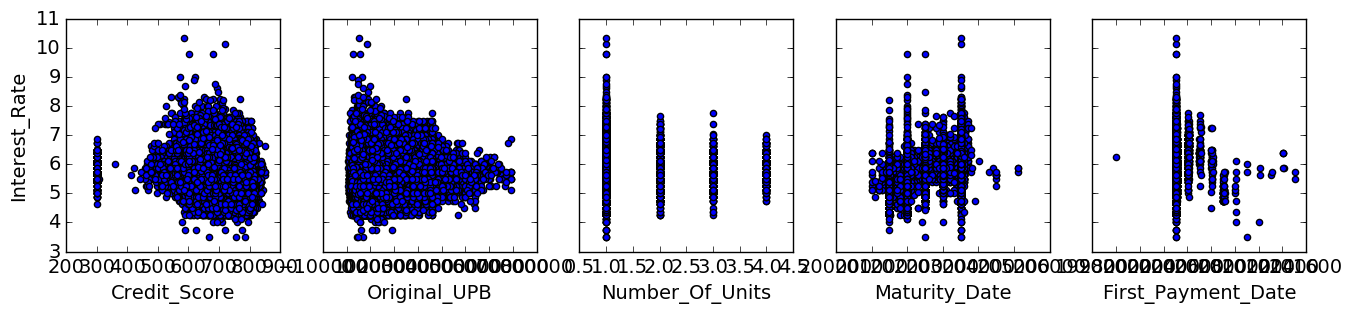

In [66]:
feature_cols = ['Credit_Score','Original_UPB','Number_Of_Units','Maturity_Date','First_Payment_Date']
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    df_PriorQuarter.plot(kind='scatter', x=feature, y='Interest_Rate', ax=axs[index], figsize=(16, 3))

In [71]:
###Build model to predict values for credit_score
# create X and y
feature_cols = ['DTI_Ratio']
X_cr = df_PriorQuarter[feature_cols]
y_cr = df_PriorQuarter.Credit_Score

In [72]:
lm = LinearRegression()
lm.fit(X_cr, y_cr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [73]:
# print the coefficients
print(lm.intercept_)
print(lm.coef_)

745.666921035
[-0.65820309]


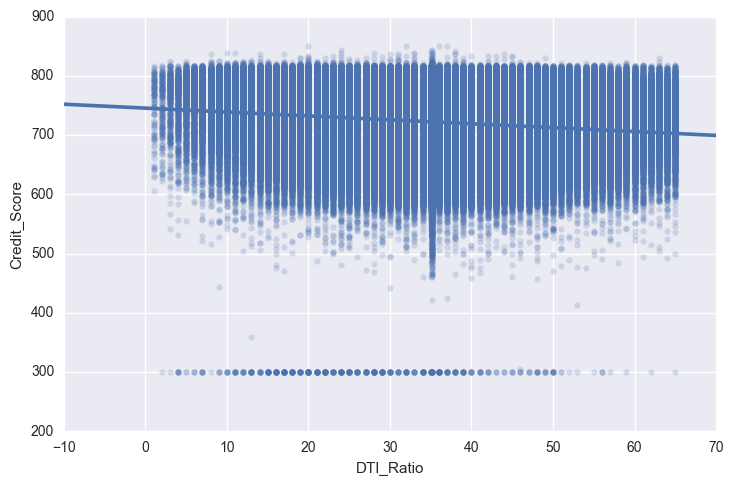

In [76]:
sns.lmplot(x='DTI_Ratio', y='Credit_Score', data=df_PriorQuarter, aspect=1.5, scatter_kws={'alpha':0.2})

In [77]:
#Feature Selection
from sklearn.feature_selection import RFE

In [81]:
df_new = df_PriorQuarter[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
df_y = df_PriorQuarter[[12]]

In [82]:
lmReg = LinearRegression()
rfe = RFE(estimator=lmReg, n_features_to_select=3, step=1)

In [83]:
rfe.fit(df_new,df_y)

C:\Users\Yamini\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
  n_features_to_select=3, step=1, verbose=0)

In [84]:
#ranking = rfe.ranking_.reshape(digits.images[0].shape)
ranking = rfe.ranking_

In [85]:
print(sorted(zip(map(lambda x: round(x, 2), rfe.ranking_), df_new.columns)))

[(1, 'First_Time_Homebuyer_Flag'), (1, 'Interest_Rate'), (1, 'Number_Of_Units'), (2, 'MI'), (3, 'Channel'), (4, 'First_Payment_Date'), (5, 'PPM'), (6, 'Property_Type'), (7, 'Loan_Purpose'), (8, 'Original_Loan_Term'), (9, 'Service_Name'), (10, 'Maturity_Date'), (11, 'Seller_Name'), (12, 'CLTV'), (13, 'Property_State'), (14, 'Number_Of_Borrowers'), (15, 'Product_Type'), (16, 'MSA'), (17, 'Loan_Sequence_Nmber'), (18, 'Credit_Score'), (19, 'LTV'), (20, 'Occupancy_Status'), (21, 'DTI_Ratio'), (22, 'Postal_Code'), (23, 'Original_UPB')]


In [495]:
#Ordinary Least Squares Assumptions 
ols_model = ols("Interest_Rate ~Credit_Score+Maturity_Date+MI+Original_Loan_Term+Occupancy_Status+Original_UPB", data=df_PriorQuarter).fit()



In [496]:
ols_model_summary = ols_model.summary()

In [497]:
HTML(
ols_model_summary\
.as_html()\
.replace(' Adj. R-squared: ', ' Adj. R-squared: ')\
.replace('coef', 'coef')\
.replace('std err', 'std err')\
.replace('P>|t|', 'P>|t|')\
.replace('[95.0% Conf. Int.]', '[95.0% Conf. Int.]')
)

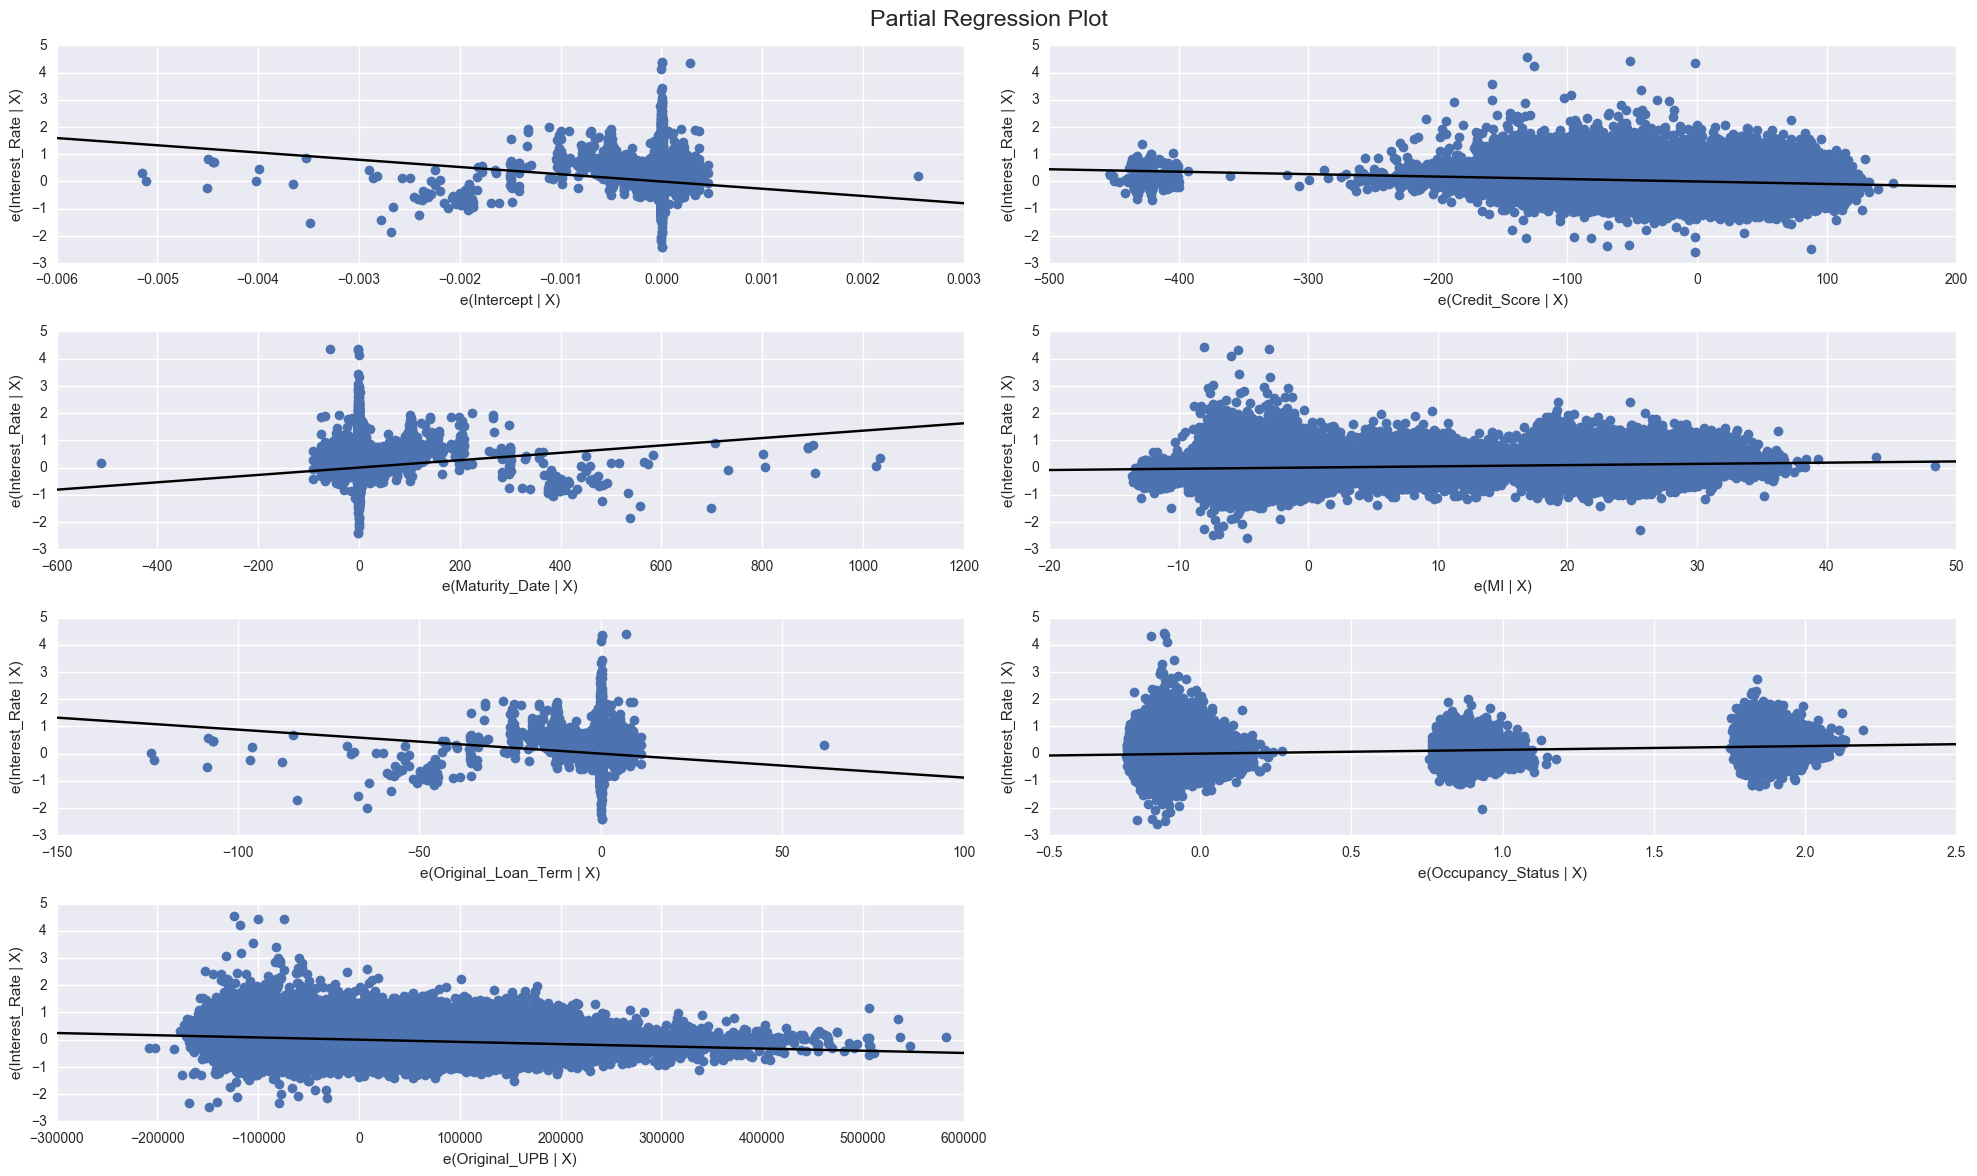

In [498]:
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(ols_model, fig=fig)

In [89]:
#Random Forest

In [567]:
#AFter checking variable importance
dataFactorize(df_PriorQuarter)
dataFactorize(df_NextQuarter)
X_R1train = df_PriorQuarter[[0,3,10,20]]
y_R1train = df_PriorQuarter.Interest_Rate
X_R1test = df_NextQuarter[[0,3,10,20]]
y_R1test = df_NextQuarter.Interest_Rate

In [568]:
dataFactorize(df_PriorQuarter)
dataFactorize(df_NextQuarter)
test_cols = df_NextQuarter.columns[df_NextQuarter.columns.str.startswith('X') == False].drop('Interest_Rate')
feature_cols = df_PriorQuarter.columns[df_PriorQuarter.columns.str.startswith('X') == False].drop('Interest_Rate')
X_Rtrain = df_PriorQuarter[feature_cols]
y_Rtrain = df_PriorQuarter.Interest_Rate
X_Rtest = df_NextQuarter[test_cols]
y_Rtest = df_NextQuarter.Interest_Rate

In [569]:
def randomForestRegression(X_Rtrain,y_Rtrain):
    rForest = RandomForestRegressor(n_estimators=100, max_features=4, oob_score=True, random_state=1)
    rForest.fit(X_Rtrain, y_Rtrain)
    #print(pd.DataFrame({'feature':feature_cols, 'importance':rForest.feature_importances_}).sort('importance'))
    return (rForest,'Random Forest')
def randomModelEvaluate(model,X_Rtest,y_Rtest):
    pred = model.predict(X_Rtest)
    MSE = mean_squared_error(pred, y_Rtest)
    randomRMSE = np.sqrt(mean_squared_error(y_Rtest, pred))
    randomMAE = sum(abs(y_Rtest-pred)) / len(y_Rtest)
    randomMAPE = np.mean(np.abs((y_Rtest - pred) / y_Rtest)) * 100
    return (pred,randomRMSE,randomMAE,randomMAPE)

In [95]:
#Using all the variables
rForest,ralgo_name = randomForestRegression(X_Rtrain,y_Rtrain)
pred, randomRMSE,randomMAE,randomMAPE = randomModelEvaluate(rForest,X_Rtest,y_Rtest)

C:\Users\Yamini\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


                      feature  importance
14               Product_Type    0.000000
13                        PPM    0.001382
6             Number_Of_Units    0.002619
21        Number_Of_Borrowers    0.008146
2   First_Time_Homebuyer_Flag    0.010309
16              Property_Type    0.013789
19               Loan_Purpose    0.015851
1          First_Payment_Date    0.018275
5                          MI    0.019655
12                    Channel    0.020137
23               Service_Name    0.028803
7            Occupancy_Status    0.033177
22                Seller_Name    0.036715
15             Property_State    0.036883
4                         MSA    0.038807
8                        CLTV    0.039839
11                        LTV    0.043921
9                   DTI_Ratio    0.044808
17                Postal_Code    0.052212
0                Credit_Score    0.065206
10               Original_UPB    0.076680
20         Original_Loan_Term    0.105457
3               Maturity_Date    0

In [570]:
#Using selected features: Credit_Score, Original_UPB, Maturity_Date, Original_Loan_Term
rForest2,ralgo_name = randomForestRegression(X_R1train,y_R1train)
pred1, randomRMSE,randomMAE,randomMAPE = randomModelEvaluate(rForest2,X_R1test,y_R1test)

In [571]:
randomMAPE

4.455899688112888

In [572]:
#Adding to the list
Model_Metrics.append((ralgo_name,randomRMSE,randomMAE,randomMAPE,rForest2))

In [103]:
###KNN

In [65]:
Knntrain = pd.read_csv(priorQuarterCleanData, sep="\t")
Knntest = pd.read_csv(nextQuarterCleanData,sep="\t")

In [554]:
number = LabelEncoder()
Knntrain['Occupancy_Status'] = number.fit_transform(Knntrain['Occupancy_Status'].astype('str'))
Knntest['Occupancy_Status'] = number.fit_transform(Knntest['Occupancy_Status'].astype('str'))


In [555]:
def knnRegression(Knntrain):
    # Create the knn model
    # Look at the five closest neighbors
    x_cols = ['Credit_Score','Original_Loan_Term','Maturity_Date','Original_UPB','MI','Occupancy_Status']
    y_col = ['Interest_Rate']
    knn = KNeighborsRegressor(n_neighbors=3)
    # Fit the model on the training data.
    model = knn.fit(Knntrain[x_cols],Knntrain[y_col])
    return (model,'Knn Regression')

In [556]:
def KnnpredictAndEvaluate(Knntest,model):
    x_cols = ['Credit_Score','Original_Loan_Term','Maturity_Date','Original_UPB','MI','Occupancy_Status']
    y_col = ['Interest_Rate']
    predictions = model.predict(Knntest[x_cols])
    # Get the actual values for the test set.
    actual = Knntest[y_col]
    # Compute the mean squared error of our predictions.
    mse = (((predictions - actual) ** 2).sum()) / len(predictions) 
    knnMAE = metrics.mean_absolute_error(actual,predictions)
    knnMAPE = np.mean(np.abs((actual - predictions) / actual)) * 100
    knnRMSE = np.sqrt(mean_squared_error(actual, predictions))
    return (actual,knnRMSE,knnMAE,knnMAPE)

In [557]:
#Run the Knn Model
Knnmodel,Kalgo_name = knnRegression(Knntrain)
actual,knnRMSE,knnMAE,knnMAPE = KnnpredictAndEvaluate(Knntest,Knnmodel)

In [573]:
#MAPE for Knn
knnMAPE[0]

4.8163083099684156

In [650]:
#Adding to the list 
Model_Metrics.append((Kalgo_name,knnRMSE,knnMAE,knnMAPE[0],Knnmodel))

In [107]:
##Neural-Network using h2o library

In [575]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.121-b13, mixed mode)
  Starting server from C:\Users\Yamini\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Yamini\AppData\Local\Temp\tmp1mfidfsw
  JVM stdout: C:\Users\Yamini\AppData\Local\Temp\tmp1mfidfsw\h2o_Yamini_started_from_python.out
  JVM stderr: C:\Users\Yamini\AppData\Local\Temp\tmp1mfidfsw\h2o_Yamini_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster version:,3.10.4.1
H2O cluster version age:,13 days
H2O cluster name:,H2O_from_python_Yamini_jvbmqm
H2O cluster total nodes:,1
H2O cluster free memory:,1.755 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"
H2O connection url:,http://127.0.0.1:54321
H2O connection proxy:,None


In [576]:
data = h2o.import_file(priorQuarterCleanData)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [577]:
testH2OData = h2o.import_file(nextQuarterCleanData)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [578]:
data.head()

Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,Original_UPB,LTV,Interest_Rate,Channel,PPM,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name
699,200505,N,203504,39300,0,1,O,56,42,190000,56,5.625,R,N,FRM,RI,SF,2800,F105Q1000001,C,360,2,Other sellers,USBANKNA
691,200504,N,203503,36420,25,1,O,90,36,90000,90,5.75,R,N,FRM,OK,SF,73000,F105Q1000002,N,360,1,Other sellers,Other servicers
713,200503,N,203502,28740,0,1,O,72,45,357000,72,6,R,N,FRM,NY,SF,12500,F105Q1000003,P,360,2,Other sellers,Other servicers
719,200505,N,203504,32900,0,1,S,85,47,195000,68,5.75,R,N,FRM,MO,CO,65000,F105Q1000004,P,360,2,Other sellers,USBANKNA
656,200503,N,203502,40340,0,1,O,68,30,253000,68,5.625,R,N,FRM,MN,SF,55900,F105Q1000005,C,360,2,Other sellers,Other servicers
641,200504,N,203503,19500,30,1,O,94,41,96000,94,6.25,R,N,FRM,IL,SF,62500,F105Q1000006,N,360,1,Other sellers,Other servicers
646,200505,N,203504,17140,0,1,O,77,43,274000,77,6.125,R,N,FRM,KY,SF,41000,F105Q1000007,N,360,2,Other sellers,Other servicers
586,200503,N,203502,28740,0,1,O,80,34,126000,80,6.125,R,N,FRM,NY,PU,12400,F105Q1000008,P,360,2,Other sellers,Other servicers
582,200503,N,203502,32900,0,1,O,80,41,88000,80,5.625,R,N,FRM,WA,MH,98900,F105Q1000009,P,360,2,Other sellers,Other servicers
720,200503,N,203502,36500,30,1,O,95,32,200000,95,5.5,T,N,FRM,WA,CO,98500,F105Q1000010,P,360,1,Other sellers,"PNCMTGESERVICES,INC"


In [824]:
#Defining columns for X and Y
y = "Interest_Rate"
#x = data.names
x = ['Credit_Score','Original_Loan_Term','Maturity_Date','Original_UPB','MI','Occupancy_Status']
#x.remove(y)

In [580]:
trainingData = data

In [825]:
def h2oDeepLearning(x,y):
    m = h2o.estimators.deeplearning.H2ODeepLearningEstimator()
    m.train(x, y, trainingData)
    return m

In [826]:
def h2oPredictAndEvaluate(m,testH2OData):
    p = m.predict(testH2OData)
    #m.model_performance(testH2OData)
    perf = m.model_performance(testH2OData)
    MSE = m.mse(perf)
    RMSE = m.rmse(perf)
    MAE = m.mae(perf)
    #return (m.model_performance(testH2OData))
    return MSE,RMSE,MAE

In [827]:
h2Omodel= h2oDeepLearning(x,y)

deeplearning Model Build progress: |██████████████████████████████████████| 100%


In [830]:
h2omse,h2ormse,h2omae= h2oPredictAndEvaluate(h2Omodel,testH2OData)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [617]:
h2o_algoname = 'Neural Network'
model = 'h2Omodel'

In [855]:
NeuralNetwork_ModelMetrics = []

In [856]:
NeuralNetwork_ModelMetrics.append((h2o_algoname,h2omse,h2ormse,h2omae,model))

In [858]:
df_Net_ModelMetrics = pd.DataFrame.from_records(NeuralNetwork_ModelMetrics, columns=["Algorithm", "MSE", "RMSE", "MAE","Model"])

In [852]:
df_ModelMetrics = pd.DataFrame.from_records(Model_Metrics, columns=["Algorithm", "RMSE", "MAE", "MAPE","Model"])

In [853]:
df_ModelMetrics['Model_Rank'] = df_ModelMetrics['MAPE'].rank(ascending=1)

In [859]:
df_Net_ModelMetrics

,Algorithm,MSE,RMSE,MAE,Model
0,Neural Network,0.080186,0.283171,0.213005,h2Omodel


In [849]:
df_ModelMetrics.to_csv(modelMetrics,sep=',', encoding='utf-8',header=True)
print("File created For Model Metrics: ModelMetrics.csv")

File created For Model Metrics: ModelMetrics.csv


In [861]:
df_Net_ModelMetrics.to_csv(neuralNetworkMetrics,sep=',', encoding='utf-8',header=True)

In [1]:
####Choose best model and perform further analysis

In [ ]:
###########Financial Crisis

In [91]:
#Function to get URL for year 2007 origination data
year2007 = 2007
year2008 = 2008
def generate2007URL(quarter):
    url2007List = []
    trn_url = "https://freddiemac.embs.com/FLoan/Data/historical_data1_Q"+str(quarter)+str(year2008)+ ".zip"
    url2007List.append(trn_url)
    return url2007List

In [92]:

#Call to function for origination data for Year 2007
url2007List = generate2007URL(1)
print("----Generated URLs----")
for fileURL in url2007List:
     print(fileURL) 


----Generated URLs----
https://freddiemac.embs.com/FLoan/Data/historical_data1_Q12008.zip


In [93]:
for fileURL in url2007List:
    try:
        response = urllib.request.urlopen(fileURL)
        if response.getcode()==200:
            data = response.read()
            print("Reading Data")
            if zipfile.is_zipfile(io.BytesIO(data)) == True:
                print("ZipFile is valid")
                z = zipfile.ZipFile(io.BytesIO(data))
                for file in z.namelist():
                    if "historical_data1_Q" in str(file):
                        print("Get the file:"+file)
                        textFile = z.read(file)
                        df_Q12008 = pd.read_csv(io.BytesIO(textFile),sep = '|',header=None)
                        print("File read into dataframe.This is raw Data.")
                        print(df_Q12008.shape)
                        df_Q12008.columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name','Super_Conforming_Flag']
            else:
                print("[ERROR] Invalid ZIP File found at " + fileURL)
                exit()
        else:
            print("[ERROR] Invalid URL, URL( " + fileURL + " ) returned a bad HTTP response code of " + str(response.getcode()))
        response.close()
    except Exception as err:
        print("Error occured, possibly an interrupted Internet connection")
        exit()

Reading Data
ZipFile is valid
Get the file:historical_data1_Q12008.txt


C:\Users\Yamini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


File read into dataframe.This is raw Data.
(398061, 26)


In [85]:
df_Q32007


,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name,Super_Conforming_Flag
0,684,200711,N,203710,48300.0,0,1.0,O,80.0,27,...,WA,SF,98800.0,F107Q3000001,C,360,2.0,Other sellers,Other servicers,NaN
1,752,200709,N,203708,20764.0,0,1.0,O,80.0,20,...,NJ,CO,8800.0,F107Q3000002,P,360,1.0,Other sellers,Other servicers,NaN
2,700,200709,N,203708,39580.0,0,1.0,O,83.0,28,...,NC,SF,27600.0,F107Q3000003,P,360,2.0,USBANKNA,USBANKNA,NaN
3,736,200710,N,203709,NaN,30,1.0,O,92.0,39,...,IN,SF,47400.0,F107Q3000004,N,360,2.0,Other sellers,Other servicers,NaN
4,633,200711,N,203710,48300.0,0,1.0,O,71.0,35,...,WA,SF,98800.0,F107Q3000005,N,360,2.0,Other sellers,Other servicers,NaN
5,778,200709,N,203708,36980.0,0,1.0,O,50.0,16,...,KY,SF,42300.0,F107Q3000006,C,360,2.0,Other sellers,Other servicers,NaN
6,753,200709,N,203708,NaN,30,1.0,O,95.0,50,...,KY,SF,42100.0,F107Q3000007,N,360,2.0,Other sellers,Other servicers,NaN
7,796,200709,N,203708,NaN,0,1.0,O,80.0,21,...,MN,SF,55900.0,F107Q3000008,P,360,2.0,Other sellers,Other servicers,NaN
8,775,200710,N,203709,NaN,0,1.0,O,47.0,22,...,OR,SF,97800.0,F107Q3000009,N,360,2.0,Other sellers,Other servicers,NaN
9,737,200709,Y,203708,NaN,0,1.0,O,80.0,18,...,IA,SF,52600.0,F107Q3000010,P,360,2.0,Other sellers,Other servicers,NaN


In [78]:
#create dataframes for all the quarters
df_Q12007data = pd.DataFrame(df_Q12007,columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name'])

In [104]:
#handleMissingData(df_Q12008data)
dataFactorize(df_Q12008data)

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name
0,771.0,200803,0,203802,32820.0,0.0,1.0,0,95.0,61.0,...,0,0,0,81200.0,0,0,360,1.0,0,0
1,729.0,200805,0,203804,17140.0,0.0,1.0,0,73.0,20.0,...,0,1,0,45200.0,1,1,360,1.0,0,1
2,769.0,200803,0,203802,32820.0,0.0,1.0,0,59.0,17.0,...,0,2,0,40300.0,2,1,360,1.0,0,1
3,755.0,200803,1,203802,32820.0,35.0,1.0,0,100.0,28.0,...,0,3,0,17900.0,3,2,360,1.0,0,1
4,760.0,200804,0,203803,48300.0,0.0,1.0,0,74.0,58.0,...,0,4,0,98800.0,4,1,360,1.0,0,1
5,781.0,200803,0,203802,32820.0,0.0,1.0,0,80.0,32.0,...,0,5,0,67800.0,5,0,360,1.0,0,1
6,732.0,200804,0,203803,35084.0,0.0,1.0,0,47.0,54.0,...,0,6,0,7400.0,6,1,360,2.0,0,1
7,730.0,200804,0,203803,14484.0,0.0,1.0,0,80.0,57.0,...,0,7,1,2100.0,7,0,360,1.0,1,0
8,736.0,200803,0,203802,32820.0,35.0,1.0,0,95.0,44.0,...,0,8,2,84500.0,8,2,360,2.0,0,1
9,745.0,200803,2,203802,30460.0,0.0,1.0,0,73.0,53.0,...,0,2,0,40300.0,9,0,360,1.0,0,1


In [185]:
Model2007_Metrics = []

In [524]:
X_2007Train = df_Q42007data[[0,3,5,7,10,21]]
y_2007Train = df_Q42007data.Interest_Rate
X_2007Test = df_Q12008data[[0,3,5,7,10,21]]
y_2007Test = df_Q12008data.Interest_Rate


In [525]:

def linearRegression2007(X_2007Train,y_2007Train):
    lm=linear_model.LinearRegression()
    lm.fit(X_2007Train,y_2007Train)
    print(lm.coef_)
    print(lm.intercept_)
    t_pred = lm.predict(X_2007Train)
    print("R-Square",r2_score(y_2007Train,t_pred))
    return lm
def predictAndEvaluate2007(lm,X_2007Test,y_2007Test):
    pred2007 = lm.predict(X_2007Test)
    MAE = mean_absolute_error(y_2007Test,pred2007)
    MSE = mean_squared_error(y_2007Test,pred2007)
    MAPE = np.mean(np.abs((y_2007Test - pred2007) / y_2007Test)) * 100
    RMSE = np.sqrt(mean_squared_error(y_2007Test, pred2007))
    #plt.scatter(X_2007Test, y_2007Test,  color='black')
    #plt.plot(X_2007Test, pred2007, color='blue',linewidth=3)
    #plt.xticks(())
    #plt.yticks(())
    #plt.show()
    return (pred2007,RMSE,MAE,MAPE)

In [526]:
lm = linearRegression2007(X_2007Train,y_2007Train)
lm

[ -1.55392258e-03  -2.32118353e-03   6.89047407e-03   1.99123471e-01
  -6.19591361e-07   2.11923856e-02]
472.849990046
R-Square 0.326695653816


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [527]:
pred2007,RMSE,MAE,MAPE = predictAndEvaluate2007(lm,X_2007Test,y_2007Test)

In [528]:
MAPE

7.106593131489102

In [529]:
Model2007_Metrics.append((RMSE,MAE,MAPE,lm))

In [530]:
Model2007_Metrics

[(0.36639629128895468,
  0.27805993648613414,
  4.355949780942227,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 (0.48968779869013745,
  0.40481482781528166,
  5.934173575582475,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 (0.40114074039401537,
  0.31312990810218072,
  4.99040233860697,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 (0.48818526633778375,
  0.40279191319178254,
  7.106593131489102,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [532]:
df_FinancialCrisis = pd.DataFrame.from_records(Model2007_Metrics, columns=["RMSE", "MAE", "MAPE","Model"])

In [533]:
df_quar = pd.DataFrame({'Quarter-Period': ['Q12007-Q22007','Q22007-Q32007','Q32007-Q42007','Q42007-Q12008']})

In [534]:
df_FinancialCrisis.join(df_quar)

,RMSE,MAE,MAPE,Model,Quarter-Period
0,0.366396,0.278060,4.355950,"LinearRegression(copy_X=True, fit_intercept=Tr...",Q12007-Q22007
1,0.489688,0.404815,5.934174,"LinearRegression(copy_X=True, fit_intercept=Tr...",Q22007-Q32007
2,0.401141,0.313130,4.990402,"LinearRegression(copy_X=True, fit_intercept=Tr...",Q32007-Q42007
3,0.488185,0.402792,7.106593,"LinearRegression(copy_X=True, fit_intercept=Tr...",Q42007-Q12008


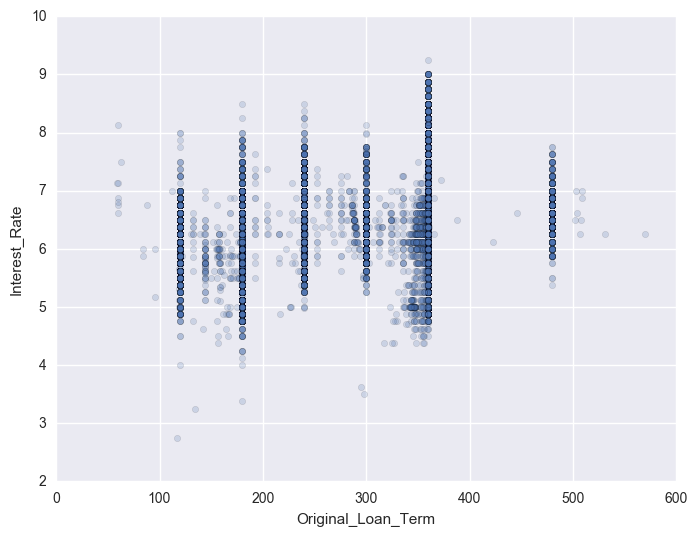

In [542]:
df_Q42007data.plot(kind='scatter', x='Original_Loan_Term', y='Interest_Rate', alpha=0.2)

In [340]:
'''
############Year 2009################

In [714]:
#year2009 = 2009
#year2010 = 2010
year1999 = 1999
def generate2009URL(quarter):
    url2009List = []
    trn_url = "https://freddiemac.embs.com/FLoan/Data/historical_data1_Q"+str(quarter)+str(year2009)+ ".zip"
    url2009List.append(trn_url)
    return url2009List

In [670]:
#Call to function for origination data for Year 2007
url2009List = generate2009URL(1)
print("----Generated URLs----")
for fileURL in url2009List:
     print(fileURL) 

----Generated URLs----
https://freddiemac.embs.com/FLoan/Data/historical_data1_Q22009.zip


In [688]:
Model2009_Metrics = []

In [671]:
for fileURL in url2009List:
    try:
        response = urllib.request.urlopen(fileURL)
        if response.getcode()==200:
            data = response.read()
            print("Reading Data")
            if zipfile.is_zipfile(io.BytesIO(data)) == True:
                print("ZipFile is valid")
                z = zipfile.ZipFile(io.BytesIO(data))
                for file in z.namelist():
                    if "historical_data1_Q" in str(file):
                        print("Get the file:"+file)
                        textFile = z.read(file)
                        df_Q22009 = pd.read_csv(io.BytesIO(textFile),sep = '|',header=None)
                        print("File read into dataframe.This is raw Data.")
                        print(df_Q22009.shape)
                        df_Q22009.columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name','Super_Conforming_Flag']
            else:
                print("[ERROR] Invalid ZIP File found at " + fileURL)
                exit()
        else:
            print("[ERROR] Invalid URL, URL( " + fileURL + " ) returned a bad HTTP response code of " + str(response.getcode()))
        response.close()
    except Exception as err:
        print("Error occured, possibly an interrupted Internet connection")
        exit()

Reading Data
ZipFile is valid
Get the file:historical_data1_Q22009.txt


C:\Users\Yamini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


File read into dataframe.This is raw Data.
(654036, 26)


In [546]:
#create dataframe for all the quarters
df_Q12009data = pd.DataFrame(df_Q12009,columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name'])

In [738]:
#handleMissingData(df_Q42009data)
#dataFactorize(df_Q12009data)
df_Q42009data['Interest_Rate'].describe()

count    350370.000000
mean          4.926019
std           0.362626
min           2.750000
25%           4.750000
50%           4.875000
75%           5.125000
max           7.750000
Name: Interest_Rate, dtype: float64

In [732]:
df_Q12009data['Interest_Rate'].describe()

count    587170.000000
mean          4.939940
std           0.367988
min           2.750000
25%           4.750000
50%           4.875000
75%           5.125000
max           7.875000
Name: Interest_Rate, dtype: float64

In [707]:
#set X and Y params
X_2009Train = df_Q32009data[[0,3,5,7,10,21]]
y_2009Train = df_Q32009data.Interest_Rate
X_2009Test = df_Q42009data[[0,3,5,7,10,21]]
y_2009Test = df_Q42009data.Interest_Rate

In [708]:
#Function
def linearRegression2009(X_2009Train,y_2009Train):
    lm2009=linear_model.LinearRegression()
    lm2009.fit(X_2009Train,y_2009Train)
    print(lm2009.coef_)
    print(lm2009.intercept_)
    t2009_pred = lm2009.predict(X_2009Train)
    print("R-Square",r2_score(y_2009Train,t2009_pred))
    return lm2009
def predictAndEvaluate2009(lm2009,X_2009Test,y_2009Test):
    pred2009 = lm.predict(X_2009Test)
    MAE2009 = mean_absolute_error(y_2009Test,pred2009)
    MSE = mean_squared_error(y_2009Test,pred2009)
    MAPE2009 = np.mean(np.abs((y_2009Test - pred2009) / y_2009Test)) * 100
    RMSE2009 = np.sqrt(mean_squared_error(y_2009Test, pred2009))
    #plt.scatter(X_2009Test, y_2009Test,  color='black')
    #plt.plot(X_2009Test, pred2009, color='blue',linewidth=3)
    #plt.xticks(())
    #plt.yticks(())
    #plt.show()
    return (pred2009,RMSE2009,MAE2009,MAPE2009)


In [709]:
lm2009 = linearRegression2009(X_2009Train,y_2009Train)

pred2009,RMSE2009,MAE2009,MAPE2009 = predictAndEvaluate2009(lm2009,X_2009Test,y_2009Test)

[ -1.85291190e-03  -2.26782157e-03   1.77897380e-03   1.00234838e-01
  -5.44505253e-07   2.16717023e-02]
461.371152903
R-Square 0.31876179493


In [710]:
Model2009_Metrics.append((RMSE2009,MAE2009,MAPE2009,lm2009))

In [706]:
Model2009_Metrics

[(1.0115689574257769,
  0.96522207499617774,
  20.343296475845513,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 (0.78324761456170511,
  0.71293587382248758,
  14.42432129040602,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [711]:
df_2009Analysis = pd.DataFrame.from_records(Model2009_Metrics, columns=["RMSE", "MAE", "MAPE","Model"])

In [712]:
df_quar2009 = pd.DataFrame({'Quarter-Period': ['Q12009-Q22009','Q22009-Q32009','Q32009-Q42009']})

In [713]:
df_2009Analysis.join(df_quar2009)

,RMSE,MAE,MAPE,Model,Quarter-Period
0,1.011569,0.965222,20.343296,"LinearRegression(copy_X=True, fit_intercept=Tr...",Q12009-Q22009
1,0.783248,0.712936,14.424321,"LinearRegression(copy_X=True, fit_intercept=Tr...",Q22009-Q32009
2,0.852148,0.807421,16.794102,"LinearRegression(copy_X=True, fit_intercept=Tr...",Q32009-Q42009


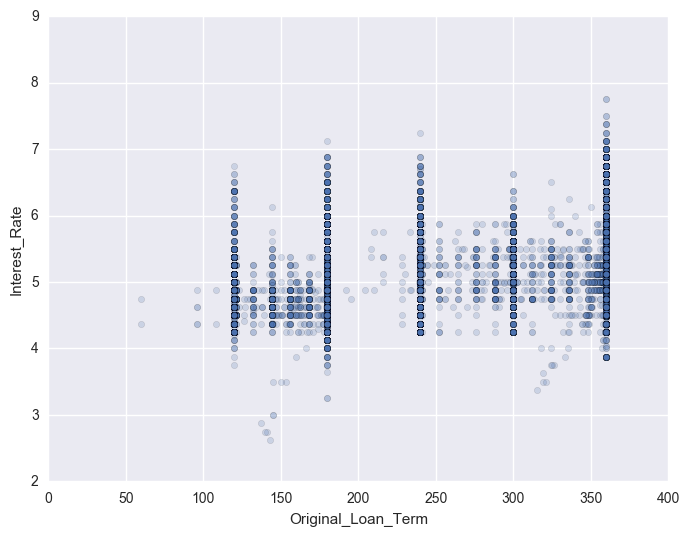

In [733]:
df_Q32009data.plot(kind='scatter', x='Original_Loan_Term', y='Interest_Rate', alpha=0.2)

In [779]:
############Economic boom############
#year1999 = 1999
year2013 = 2013
def generateEcoURL(quarter):
    urlEcoList = []
    trn_url = "https://freddiemac.embs.com/FLoan/Data/historical_data1_Q"+str(quarter)+str(year2013)+ ".zip"
    urlEcoList.append(trn_url)
    return urlEcoList

In [791]:
#Call to function for origination data for Year 2007
urlEcoList = generateEcoURL(4)
print("----Generated URLs----")
for fileURL in urlEcoList:
     print(fileURL)

----Generated URLs----
https://freddiemac.embs.com/FLoan/Data/historical_data1_Q42013.zip


In [792]:
for fileURL in urlEcoList:
    try:
        response = urllib.request.urlopen(fileURL)
        if response.getcode()==200:
            data = response.read()
            print("Reading Data")
            if zipfile.is_zipfile(io.BytesIO(data)) == True:
                print("ZipFile is valid")
                z = zipfile.ZipFile(io.BytesIO(data))
                for file in z.namelist():
                    if "historical_data1_Q" in str(file):
                        print("Get the file:"+file)
                        textFile = z.read(file)
                        df_Q42013 = pd.read_csv(io.BytesIO(textFile),sep = '|',header=None)
                        print("File read into dataframe.This is raw Data.")
                        print(df_Q42013.shape)
                        df_Q42013.columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name','Super_Conforming_Flag']
            else:
                print("[ERROR] Invalid ZIP File found at " + fileURL)
                exit()
        else:
            print("[ERROR] Invalid URL, URL( " + fileURL + " ) returned a bad HTTP response code of " + str(response.getcode()))
        response.close()
    except Exception as err:
        print("Error occured, possibly an interrupted Internet connection")
        exit()

Reading Data
ZipFile is valid
Get the file:historical_data1_Q42013.txt


C:\Users\Yamini\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (0,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


File read into dataframe.This is raw Data.
(221410, 26)


In [793]:
#create dataframe for all the quarters
df_Q42013data = pd.DataFrame(df_Q42013,columns =['Credit_Score', 'First_Payment_Date', 'First_Time_Homebuyer_Flag','Maturity_Date',
                                                   'MSA','MI','Number_Of_Units','Occupancy_Status','CLTV','DTI_Ratio',
                                                   'Original_UPB','LTV','Interest_Rate','Channel','PPM','Product_Type',
                                                   'Property_State','Property_Type','Postal_Code','Loan_Sequence_Nmber',
                                                   'Loan_Purpose','Original_Loan_Term','Number_Of_Borrowers','Seller_Name',
                                                    'Service_Name'])

In [801]:
#handleMissingData(df_Q42013data)
dataFactorize(df_Q42013data)
#df_Q32013data

,Credit_Score,First_Payment_Date,First_Time_Homebuyer_Flag,Maturity_Date,MSA,MI,Number_Of_Units,Occupancy_Status,CLTV,DTI_Ratio,...,Product_Type,Property_State,Property_Type,Postal_Code,Loan_Sequence_Nmber,Loan_Purpose,Original_Loan_Term,Number_Of_Borrowers,Seller_Name,Service_Name
0,742.0,201312,0,204311,33124.0,0,1,0,80.0,43.0,...,0,0,0,42100,0,0,360,2,0,0
1,609.0,201402,0,204401,33340.0,0,1,0,56.0,19.0,...,0,1,0,53200,1,1,360,2,0,1
2,688.0,201312,0,204311,17020.0,0,1,0,40.0,49.0,...,0,2,0,95900,2,0,360,1,0,0
3,694.0,201402,0,204401,33124.0,0,1,0,75.0,17.0,...,0,3,0,51300,3,1,360,1,0,0
4,722.0,201402,0,204401,33124.0,0,1,0,77.0,36.0,...,0,4,0,61900,4,0,360,1,0,2
5,790.0,201402,0,204401,33124.0,0,1,1,74.0,47.0,...,0,5,0,81200,5,0,360,1,0,3
6,789.0,201401,1,204312,35614.0,0,1,0,80.0,39.0,...,0,6,0,10900,6,2,360,1,0,0
7,672.0,201402,0,204401,43580.0,12,1,0,85.0,37.0,...,0,3,0,51100,7,0,360,2,0,1
8,807.0,201401,2,204312,33124.0,25,1,0,90.0,41.0,...,0,1,0,53500,8,2,360,1,0,0
9,675.0,201401,2,204312,33124.0,30,1,0,95.0,30.0,...,0,7,0,49000,9,2,360,2,0,0


In [805]:
Model2013_Metrics = []

In [814]:
#set c and y param
#1999
#X_1999Train = df_Q21999data[[0,3,5,7,10,21]]
#y_1999Train = df_Q21999data.Interest_Rate
#X_1999Test = df_Q31999data[[0,3,5,7,10,21]]
#y_1999Test = df_Q31999data.Interest_Rate

#2013
X_2013Train = df_Q32013data[[0,3,5,7,10,21]]
y_2013Train = df_Q32013data.Interest_Rate
X_2013Test = df_Q42013data[[0,3,5,7,10,21]]
y_2013Test = df_Q42013data.Interest_Rate

In [809]:

def linearRegression1999(X_1999Train,y_1999Train):
    lm=linear_model.LinearRegression()
    lm.fit(X_1999Train,y_1999Train)
    print(lm.coef_)
    print(lm.intercept_)
    t_pred = lm.predict(X_1999Train)
    print("R-Square",r2_score(y_1999Train,t_pred))
    return lm
def predictAndEvaluate1999(lm,X_1999Test,y_1999Test):
    pred1999 = lm.predict(X_1999Test)
    MAE = mean_absolute_error(y_1999Test,pred1999)
    MSE = mean_squared_error(y_1999Test,pred1999)
    MAPE = np.mean(np.abs((y_1999Test - pred1999) / y_1999Test)) * 100
    RMSE = np.sqrt(mean_squared_error(y_1999Test, pred1999))
    return (pred1999,RMSE,MAE,MAPE)

In [815]:
def linearRegression2013(X_2013Train,y_2013Train):
    lm=linear_model.LinearRegression()
    lm.fit(X_2013Train,y_2013Train)
    print(lm.coef_)
    print(lm.intercept_)
    t_pred = lm.predict(X_2013Train)
    print("R-Square",r2_score(y_2013Train,t_pred))
    return lm
def predictAndEvaluate2013(lm,X_2013Test,y_2013Test):
    pred2013 = lm.predict(X_2013Test)
    MAE = mean_absolute_error(y_2013Test,pred2013)
    MSE = mean_squared_error(y_2013Test,pred2013)
    MAPE = np.mean(np.abs((y_2013Test - pred2013) / y_2013Test)) * 100
    RMSE = np.sqrt(mean_squared_error(y_2013Test, pred2013))
    return (pred2013,RMSE,MAE,MAPE)


In [816]:
lm2013 = linearRegression2013(X_2013Train,y_2013Train)

pred2013,RMSE2013,MAE2013,MAPE2013 = predictAndEvaluate2013(lm2013,X_2013Test,y_2013Test)

[ -1.65991621e-03   4.31272734e-03   3.74274882e-03   1.68602481e-01
  -3.64668302e-07  -3.09909627e-02]
-864.28861598
R-Square 0.53009538038


In [817]:
Model2013_Metrics.append((RMSE2013,MAE2013,MAPE2013,lm2013))

In [818]:
Model2013_Metrics

[(0.28758277960447753,
  0.2153906539231869,
  6.062558147754729,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 (0.69826696328384008,
  0.60338138311143552,
  13.886195724971278,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)),
 (0.3362750593967056,
  0.26730134414376067,
  6.251444655089498,
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]

In [821]:
df_2013Analysis = pd.DataFrame.from_records(Model2013_Metrics, columns=["RMSE", "MAE", "MAPE","Model"])

In [822]:
df_2013Analysis

,RMSE,MAE,MAPE,Model
0,0.287583,0.215391,6.062558,"LinearRegression(copy_X=True, fit_intercept=Tr..."
1,0.698267,0.603381,13.886196,"LinearRegression(copy_X=True, fit_intercept=Tr..."
2,0.336275,0.267301,6.251445,"LinearRegression(copy_X=True, fit_intercept=Tr..."
